# 02. PyTorch Classification Exercises

In [203]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

### 1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function.
* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors.
* Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [204]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [205]:
n_samples = 1000

X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=42)

In [206]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

In [208]:
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_0 = MoonModelV0()
model_0

MoonModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): ReLU()
  )
)

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [209]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [210]:
from torchmetrics.classification import Accuracy

In [211]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

# Defining accuracy function
accuracy = Accuracy(task="binary")

for epoch in range(epochs+1):
    ### Training
    model_0.train()
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))       # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate the loss 
    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(test_pred, y_test)
    
    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6948 | Accuracy: 0.40% | Test Loss: 0.6948 | Test Accuracy: 0.42%
Epoch: 1000 | Loss: 0.6182 | Accuracy: 0.71% | Test Loss: 0.6272 | Test Accuracy: 0.69%
Epoch: 2000 | Loss: 0.5327 | Accuracy: 0.83% | Test Loss: 0.5390 | Test Accuracy: 0.81%
Epoch: 3000 | Loss: 0.4973 | Accuracy: 0.86% | Test Loss: 0.4958 | Test Accuracy: 0.86%
Epoch: 4000 | Loss: 0.4799 | Accuracy: 0.87% | Test Loss: 0.4776 | Test Accuracy: 0.88%
Epoch: 5000 | Loss: 0.4702 | Accuracy: 0.88% | Test Loss: 0.4683 | Test Accuracy: 0.88%
Epoch: 6000 | Loss: 0.4636 | Accuracy: 0.89% | Test Loss: 0.4613 | Test Accuracy: 0.90%
Epoch: 7000 | Loss: 0.4577 | Accuracy: 0.89% | Test Loss: 0.4550 | Test Accuracy: 0.90%
Epoch: 8000 | Loss: 0.4508 | Accuracy: 0.90% | Test Loss: 0.4481 | Test Accuracy: 0.90%
Epoch: 9000 | Loss: 0.4418 | Accuracy: 0.91% | Test Loss: 0.4384 | Test Accuracy: 0.91%
Epoch: 10000 | Loss: 0.4310 | Accuracy: 0.92% | Test Loss: 0.4269 | Test Accuracy: 0.94%


### 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [212]:
from helper_functions import plot_decision_boundary

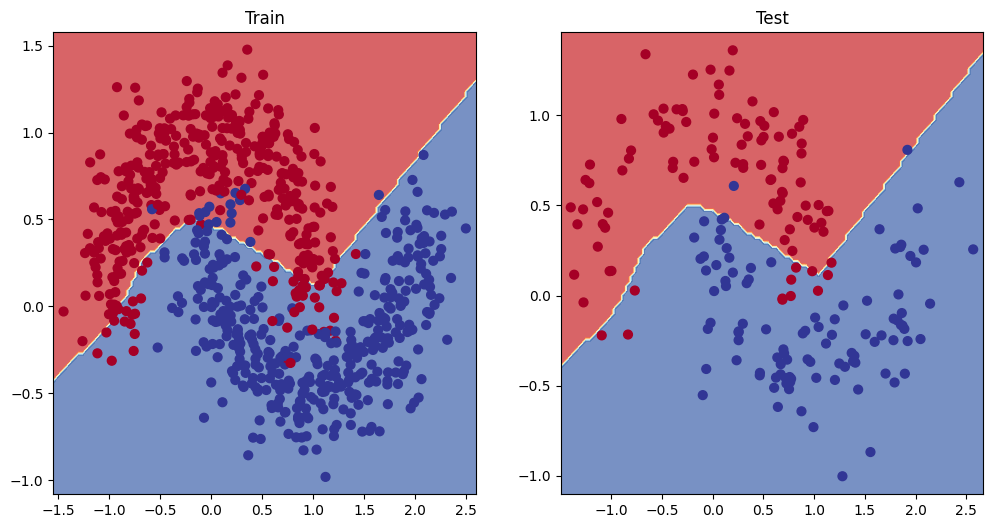

In [213]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)            # Rows, columns, index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

In [214]:
t = torch.arange(0, 1, 0.1)

In [215]:
def tanh(z):
    return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

In [216]:
torch.tanh(t)

tensor([0.0000, 0.0997, 0.1974, 0.2913, 0.3799, 0.4621, 0.5370, 0.6044, 0.6640,
        0.7163])

In [217]:
tanh(t)

tensor([0.0000, 0.0997, 0.1974, 0.2913, 0.3799, 0.4621, 0.5370, 0.6044, 0.6640,
        0.7163])

### 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

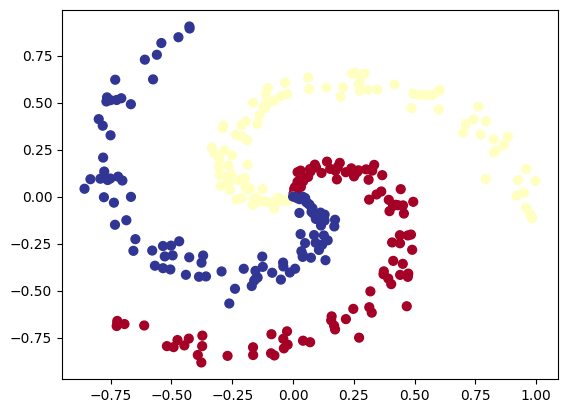

In [218]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [219]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [221]:
# Let's calculuate the accuracy for when we fit our model

acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [222]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (output classes) to the model
            hidden_units (int): Number of hidden units between layers, default 8
        """
        
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)


# Instantiate model and send it to device
model_1 = SpiralModel(input_features=2, output_features=4).to(device)

In [223]:
# Setup data to be device agnostic
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
logits = model_1(X_test[:10])
print(logits)

print("Pred probs:")
pred_probs = torch.softmax(logits, dim=1)
print(pred_probs)

print("Pred labels:")
pred_labels = torch.argmax(pred_probs, dim=1)
print(pred_labels)

Logits:
tensor([[ 0.2223, -0.3213,  0.0834, -0.0428],
        [ 0.2383, -0.2637,  0.1243,  0.0119],
        [ 0.2095, -0.3409,  0.0457, -0.0304],
        [ 0.2196, -0.3286,  0.0737, -0.0438],
        [ 0.2307, -0.2900,  0.1095, -0.0465],
        [ 0.2237, -0.2965,  0.0965, -0.0528],
        [ 0.0731, -0.3146, -0.1286, -0.2070],
        [ 0.2320, -0.3069,  0.0942, -0.0293],
        [ 0.2229, -0.3228,  0.0792, -0.0400],
        [ 0.1222, -0.3319, -0.0682, -0.1469]], grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.3107, 0.1804, 0.2704, 0.2384],
        [0.3035, 0.1837, 0.2708, 0.2420],
        [0.3113, 0.1795, 0.2643, 0.2449],
        [0.3115, 0.1800, 0.2692, 0.2393],
        [0.3088, 0.1835, 0.2736, 0.2341],
        [0.3093, 0.1838, 0.2723, 0.2346],
        [0.3075, 0.2087, 0.2514, 0.2324],
        [0.3101, 0.1809, 0.2702, 0.2388],
        [0.3111, 0.1803, 0.2695, 0.2392],
        [0.3100, 0.1969, 0.2563, 0.2369]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0,

In [224]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [225]:
# Build a training loop for the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  
  # 1. Forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_train, y_pred)
  
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test)
      test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
      
      # 2. Caculate loss and acc
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acc_fn(y_test, test_preds)
    
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.3946 | Accuracy: 0.32 | Test Loss: 1.3473 | Test Acc: 0.37
Epoch: 100 | Loss: 0.9878 | Accuracy: 0.46 | Test Loss: 1.0095 | Test Acc: 0.38
Epoch: 200 | Loss: 0.8688 | Accuracy: 0.50 | Test Loss: 0.8790 | Test Acc: 0.48
Epoch: 300 | Loss: 0.7491 | Accuracy: 0.58 | Test Loss: 0.7626 | Test Acc: 0.57
Epoch: 400 | Loss: 0.6782 | Accuracy: 0.58 | Test Loss: 0.6987 | Test Acc: 0.55
Epoch: 500 | Loss: 0.6198 | Accuracy: 0.64 | Test Loss: 0.6493 | Test Acc: 0.55
Epoch: 600 | Loss: 0.5532 | Accuracy: 0.70 | Test Loss: 0.5922 | Test Acc: 0.65
Epoch: 700 | Loss: 0.4920 | Accuracy: 0.73 | Test Loss: 0.5291 | Test Acc: 0.70
Epoch: 800 | Loss: 0.4392 | Accuracy: 0.78 | Test Loss: 0.4640 | Test Acc: 0.80
Epoch: 900 | Loss: 0.3857 | Accuracy: 0.83 | Test Loss: 0.3991 | Test Acc: 0.85
Epoch: 1000 | Loss: 0.3314 | Accuracy: 0.86 | Test Loss: 0.3356 | Test Acc: 0.87
Epoch: 1100 | Loss: 0.2846 | Accuracy: 0.89 | Test Loss: 0.2787 | Test Acc: 0.90
Epoch: 1200 | Loss: 0.2468 | Accuracy: 0

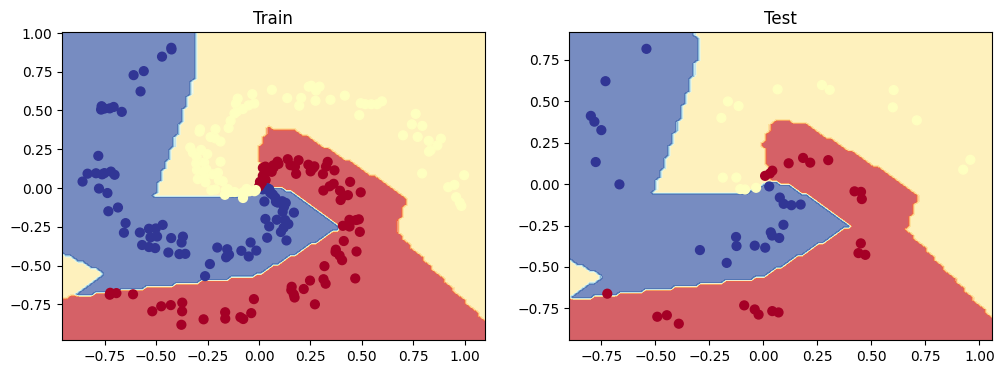

In [226]:
# Plot decision boundaries for training and test set
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)